=> First few rows of the DataFrame:
       country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol  
0                           0.0  
1                           4.9  
2                           0.7  
3                          12.4  
4                           5.9  
=> Last few rows of the DataFrame:
       country  beer_servings  spirit_servings  wine_servings  \
188  Venezuela            333              100              3   
189    Vietnam            111                2              1   
190      Yemen              6                0              0   
191     Zambia             32               19              4   
192   Zim

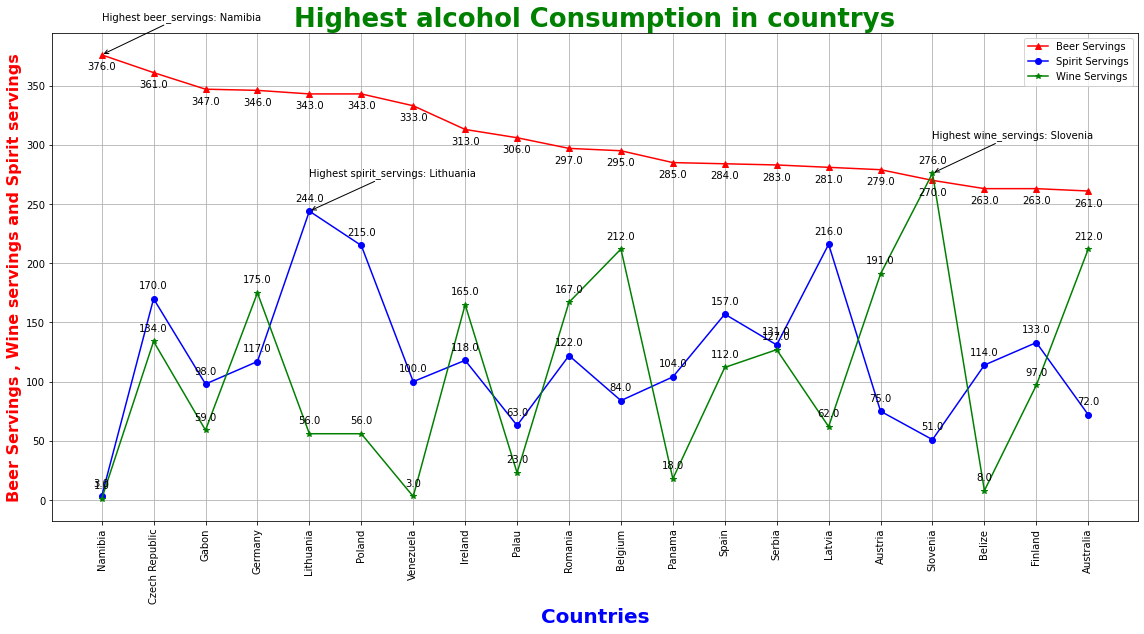

=> This pie chart is created to show the total liters of pure alcohol by country


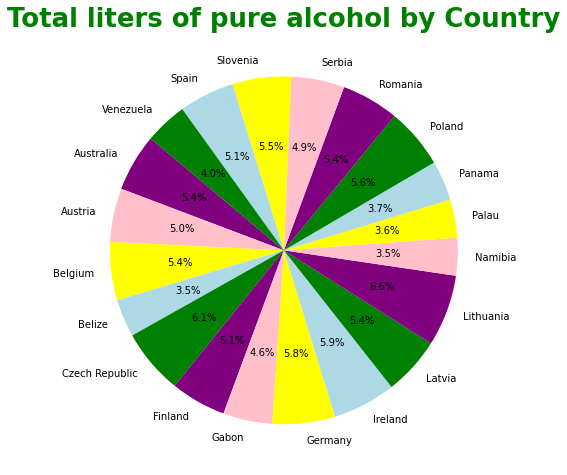

=> This bar graph is created to visualize beer and spirit servings for the top 20 countries. The highest beer and spirit servings are highlighted with annotations.


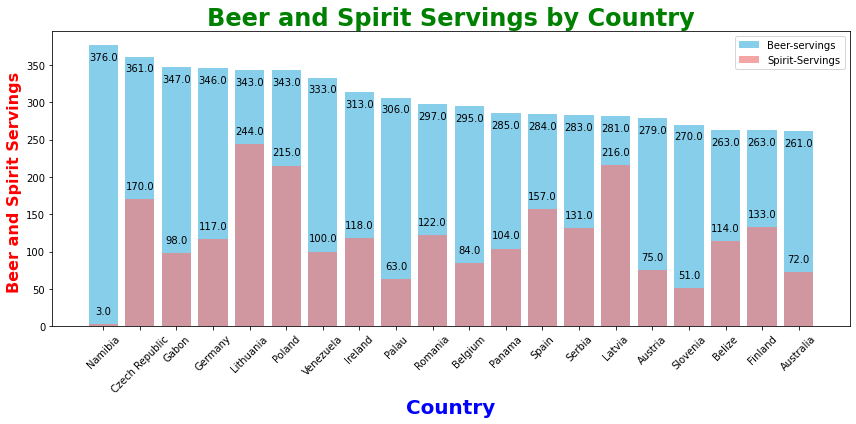

In [3]:
# Importing the required libraries for the visualisation
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np

#applying main functions 
def parse_and_cleanse_data(alcohol_servings_file_path):
    """
    Read and preprocess the data from a CSV file which i have loded.

    Args:
    file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: Preprocessed DataFrame.
    """
    # Use a meaningful variable name for the DataFrame to enhance code clarity
    df = pd.read_csv(alcohol_servings_file_path)
    return df

def main():
    # Read and preprocess data from a loaded CSV file
    alcohol_servings_file_path = "C:/Users/Saikiran/Desktop/Linkidin home/Projects/Data visualisation -1/drinks.csv"
    df = parse_and_cleanse_data(alcohol_servings_file_path)

    # showing basic information about the DataFrame
    print("=> First few rows of the DataFrame:")
    print(df.head())

    print("=> Last few rows of the DataFrame:")
    print(df.tail())

    # the shape of the DataFrame in rows and columns, which i have loded in the path
    rows, columns = df.shape
    print(f"=> The DataFrame has: {rows} rows and {columns} columns.")

    # Checking for null values in the DataFrame
    print("=> Checking for any null values in the DataFrame and dropping the null values")
    missing_values = df.isnull()
    missing_count = missing_values.sum()
    total_count = len(df)
    print("Missing Value Counts:")# Display the missing value counts
    print(missing_count)

    # the top 20 countries with servings are filtered and a new DataFrame is result_df created with thease rows
    top_country = df.nlargest(20, 'beer_servings')
    initial_rows = len(df)
    
    # Creating a new DataFrame with the selected rows
    result_df = top_country.reset_index(drop=True)
    rows_dropped = initial_rows - len(result_df)
    
    print("=> Top 20-Largest countries Resulting DataFrame:")
    print(f"=> {rows_dropped} rows were dropped in the initial DataFrame = df, and the new DataFrame is as follows:")
    print(result_df)

    # Creating a line plot
    create_line_plot(result_df)
 
    # Creating the pie chart
    create_pie_chart(result_df, 'country', 'total_litres_of_pure_alcohol', "Total liters of pure alcohol by Country")

    # Creating a bar graph
    create_bar_graph(result_df)

def create_line_plot(data):
    """
    Creating a line plot to visualize beer, spirit, and wine servings by country.

    Args:
    data (pd.DataFrame): Data containing country, beer_servings, spirit_servings, and wine_servings.
    """
    # Creating a line plot to visualize beer, spirit, and wine servings
    print("=> This line plot shows that each highest Servings in countries")

    plt.figure(figsize=(16, 8))
    plt.plot(data['country'], data['beer_servings'], marker='^', linestyle='-', color='r', label='Beer Servings')
    plt.plot(data['country'], data['spirit_servings'], marker='o', linestyle='-', color='b', label='Spirit Servings')
    plt.plot(data['country'], data['wine_servings'], marker='*', linestyle='-', color='g', label='Wine Servings')
    
    # Additional plot formatting and annotations
    for country, beer_servings in zip(data['country'], data['beer_servings']):
        plt.annotate(f'{beer_servings:.1f}', (country, beer_servings), textcoords="offset points", xytext=(0, -15), ha='center')
    
    for country, spirit_servings in zip(data['country'], data['spirit_servings']):
        plt.annotate(f'{spirit_servings:.1f}', (country, spirit_servings), textcoords="offset points", xytext=(0, 10), ha='center')
        
    for country, wine_servings in zip(data['country'], data['wine_servings']):
        plt.annotate(f'{wine_servings:.1f}', (country, wine_servings), textcoords="offset points", xytext=(0, 10), ha='center')
    
    # Highlight the country with the highest beer_servings
    max_beer_servings_country = data.loc[data['beer_servings'].idxmax()]['country']
    plt.annotate(f'Highest beer_servings: {max_beer_servings_country}',
                 xy=(max_beer_servings_country, data['beer_servings'].max()),
                 xytext=(max_beer_servings_country, data['beer_servings'].max() + 30),
                 arrowprops=dict(arrowstyle='->'))
    # Highlight the country with the highest spirit_servings
    max_spirit_servings_country = data.loc[data['spirit_servings'].idxmax()]['country']
    plt.annotate(f'Highest spirit_servings: {max_spirit_servings_country}',
                 xy=(max_spirit_servings_country, data['spirit_servings'].max()),
                 xytext=(max_spirit_servings_country, data['spirit_servings'].max() + 30),
                 arrowprops=dict(arrowstyle = '->'))
    # Highlight the country with the highest wine_servings
    max_wine_servings_country = data.loc[data['wine_servings'].idxmax()]['country']
    plt.annotate(f'Highest wine_servings: {max_wine_servings_country}',
                 xy=(max_wine_servings_country, data['wine_servings'].max()),
                 xytext=(max_wine_servings_country, data['wine_servings'].max() + 30),
                 arrowprops=dict(arrowstyle = '->'))
    
    plt.xlabel('Countries', color='b', fontweight='bold', fontsize=20)
    plt.ylabel('Beer Servings , Wine servings and Spirit servings', color='r', fontweight='bold', fontsize=16)
    plt.title('Highest alcohol Consumption in countrys', color='g', fontweight='bold', fontsize=26)
    plt.tight_layout() #for better visualization of the plot it improves spacing and layout
    plt.legend()
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

def create_pie_chart(data, category_column, value_column, title):   
    """
    Create a pie chart based on a specific category column and its values.

    Args:
    data (pd.DataFrame): Data containing the category and values.
    category_column (str): The column containing the categories.
    value_column (str): The column containing the values.
    title (str): The title of the pie chart.
    """
    print("=> This pie chart is created to show the total liters of pure alcohol by country")
    
    category_share = data.groupby(category_column)[value_column].sum()
    plt.figure(figsize=(8, 8))
    plt.pie(category_share, labels=category_share.index, autopct='%1.1f%%', startangle=140, colors=['purple', 'pink', 'yellow', 'lightblue', 'green'])
    plt.title(title, color='g', fontweight='bold', fontsize=26)
    plt.show()

def create_bar_graph(data):   
    """
    Create a bar graph to visualize population share and GDP weighted share for the top 20 countries.

    Args:
    data (pd.DataFrame): Data containing population share and GDP weighted share.
    """
    print("=> This bar graph is created to visualize beer and spirit servings for the top 20 countries. The highest beer and spirit servings are highlighted with annotations.")
    
    top_20_data = data.nlargest(20, 'beer_servings')
    plt.figure(figsize=(12, 6))
    plt.bar(top_20_data['country'], top_20_data['beer_servings'], color='skyblue', label='Beer-servings')
    plt.bar(top_20_data['country'], top_20_data['spirit_servings'], color='lightcoral', label='Spirit-Servings', alpha=0.7)
    plt.xlabel('Country', color='b', fontweight='bold', fontsize=20)
    plt.ylabel('Beer and Spirit Servings ', color='r', fontweight='bold', fontsize=16)
    plt.title('Beer and Spirit Servings by Country', color='g', fontweight='bold', fontsize=24)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    # Additional plot formatting and annotations
    for country, beer_servings in zip(data['country'], data['beer_servings']):
        plt.annotate(f'{beer_servings:.1f}', (country, beer_servings), textcoords="offset points", xytext=(0, -15), ha='center')
    
    for country, spirit_servings in zip(data['country'], data['spirit_servings']):
        plt.annotate(f'{spirit_servings:.1f}', (country, spirit_servings), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.show()
    
    # The code ends by calling the `main` function 'if' it is the main script.

if __name__ == "__main__":
    main()
